# KerasによるMNIST画像分類チュートリアル

## はじめに

### Jupyter notebook の簡単な使い方の説明

Ctrl + Enter でセル内のプログラムを実行します！

In [1]:
print("Hello! Python!!")

Hello! Python!!


Shift + Enter でセル内のプログラムを実行して、その下にセルを追加します！

In [2]:
print("Hello! Keras!!")

Hello! Keras!!


## 概要
このノートではMNISTという手書き文字のデータセットに対して、0から9までの数字の画像とその答えが入っていて、この画像を分類するための特徴をつかむためにディープラーニングをする。

In [1]:
## development environment
# keras=2.0.5
# tensorflow=1.2.0
import keras
import tensorflow as tf
import dask

print("keras={}".format(keras.__version__))
print("tensorflow={}".format(tf.__version__))
print("dask={}".format(dask.__version__))

/Users/Kakutofu/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/Users/Kakutofu/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


keras=2.1.2
tensorflow=1.4.1
dask=0.16.1


## モジュールのインポート

+ シード値  
機械学習を行うにあたって60000枚あるデータ全てを学習するのではなく，学習するデータの中から幾つかを選んで学習を行っている．そのため乱数のシード値を定めることで，どのPCにおいても同じ結果を得ることができる．

+ Sequentialモデル  
Sequentialモデルとは，機械学習をするための形を定義するもので，その中でも入力データを受け付けるためのモデルのイメージ．詳しくは後述するSVGを
見てもらうとわかりやすいかも．

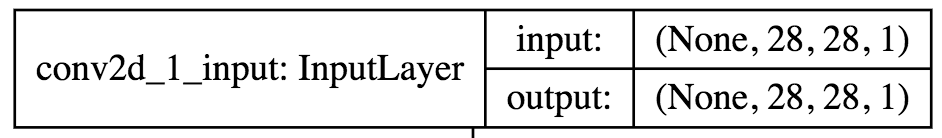

+ Denseモデル  
ニューラルネットワークにおける全結合ネットのことを指す．パーセプトロン一つ一つの出力が次のパーセプトロンのすべての入力につながるようなネットワークを指す．

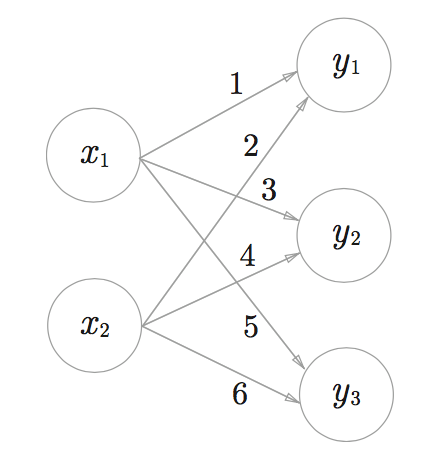

In [2]:
# coding=utf8
import numpy as np
np.random.seed(98) # シード値の保持

from keras.models import Sequential
from keras.layers import Dense

## MNISTデータの読み込み

In [3]:
# MNISTの手書き文字データのインポート
from keras.datasets import mnist

In [28]:
#  Xは画像データ，yは画像データのラベル(0から9)
(X_train, y_train), (X_test, y_test) = mnist.load_data()

## MNISTデータの前処理

入力する画像の次元数(ここで言う次元数って言うのは行列の数をイメージするとわかりやすいかも)  
28 * 28 次元って言うのは，縦28ピクセル，横28ピクセルの画像を扱っているっていうイメージでok．

In [29]:
img_rows, img_cols = 28,28

画像は0から255までの数字を使って白黒で表現されているので，ここでは値を大きくしないために255で割ってあげて，白黒表現を0から1の間で表現している．なので型もintではなくfloatにする必要がある

In [30]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.

In [31]:
nb_classes = 10 # 正解のパターン数

学習用の画像データのラベルは0から9までの数字で表現されていた．ここでは画像を機械学習して分類をしたいので，ただ数字で表すのではなく正解のパターンのなかのどこになるのかを表現する必要があるので，クラスベクトルをバイナリクラスの行列に変換している．

In [32]:
from keras.utils import np_utils

In [33]:
# クラスベクトルをバイナリクラスの行列に変換する
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

In [34]:
# クラスベクトル(ここでは一枚目の正解値は5)
y_train[0]

5

In [35]:
# バイナリクラスの行列(10個ある正解パターンの中の6番目(0から数えて))
# 上も下もどちらも正解値は５を示している．
Y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

# backendの違いによる次元数の入力型の調整(おまじない)
from keras import backend as K

if K.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [36]:
X_train.shape # 60000枚の画像データが28 * 28 ピクセルで準備されている

(60000, 784)

In [37]:
y_train.shape # 60000個のラベルデータ

(60000,)

## モデルの構築

### 全結合3層ニューラルネット
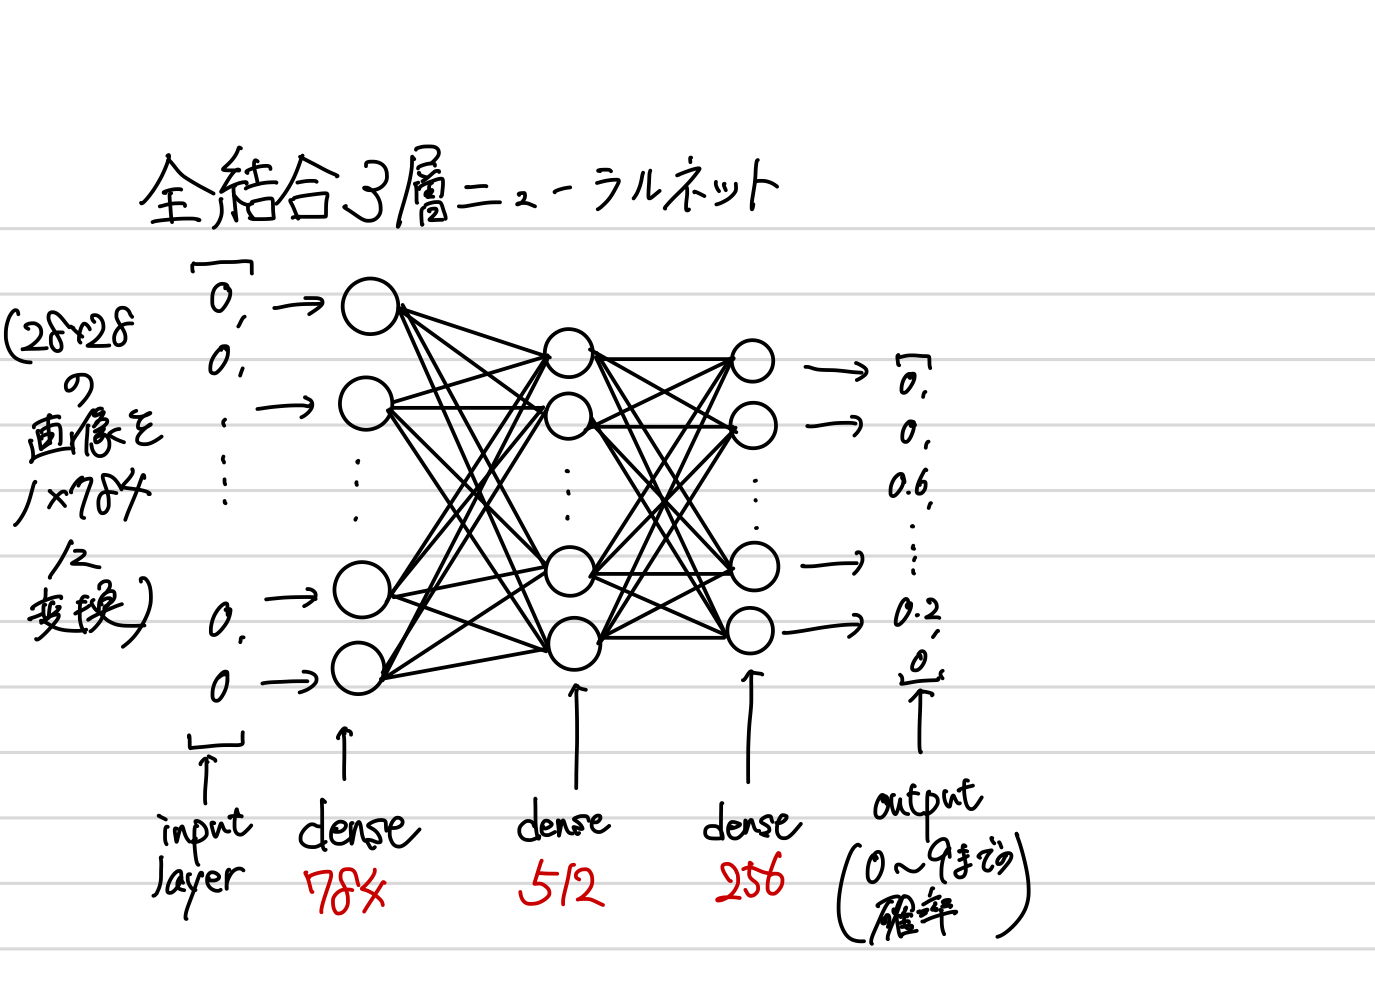

In [38]:
model = Sequential()
model.add(Dense(512, activation="relu", input_shape=(784,)))
model.add(Dense(256, activation="relu", input_shape=(512,)))
model.add(Dense(nb_classes, activation="softmax"))

In [39]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_5 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_6 (Dense)              (None, 10)                2570      
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________


## モデルのコンパイル

In [40]:
from keras.optimizers import SGD, Adadelta # 最適化手法(確率的勾配降下法,Adadelta)

# モデルのコンパイル
model.compile(loss="categorical_crossentropy", # 誤差(損失)関数
             # optimizer="sgd",
             optimizer="Adadelta", # 急速かつ単調な学習率の低下を防ぐ手段を探る最適化関数
             metrics=['accuracy'] # 評価指標
             )

## モデルの保存とパラメータの保存

In [41]:
# JSON形式でモデルを保存
json_string = model.to_json()
#open('./keras_mlp.json', 'w').write(json_string)
open('./keras_fc.json', 'w').write(json_string)

1602

In [42]:
#　初期ウエイトの保存
model.save_weights('./mnist_fc_init_weight.hdf5', overwrite=True)

## モデルの読み出しとパラメータの呼び出し

In [43]:
#from keras.models import model_from_json, model_from_yaml

In [44]:
# JSON形式で保存されたモデルの呼び出し
#json_string = open('./keras_mlp.json', 'r').read()
#model = model_from_json(json_string)

In [45]:
#model.load_weights('./mnist_cnn_best_weight.hdf5')

## MNISTデータの可視化

In [46]:
# 可視化用ライブラリの読み込み
%matplotlib inline
import matplotlib.pyplot as plt

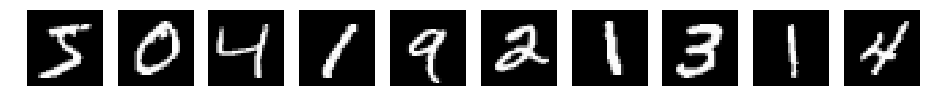

In [47]:
# 入力データを可視化（最初の10文字）
fig, ax = plt.subplots(1, 10, figsize=(16,10))

for ii in range(10):
    ax[ii].imshow(X_train[ii].reshape(28,28), cmap='gray')
    ax[ii].axis('off')

## 学習
+ tensorboard --logdir=/tmp/keras_mlp
+ http://0.0.0.0:6006

In [48]:
# TensorBoardで学習の進捗状況をみる
tb_cb = keras.callbacks.TensorBoard(log_dir='/tmp/keras_fc', histogram_freq=1)

# バリデーションロスが下がれば、エポックごとにモデルを保存
cp_cb = keras.callbacks.ModelCheckpoint(filepath='./mnist_fc_best_weight.hdf5', 
                                        monitor='val_loss', verbose=1, save_best_only=True, mode='auto')

# バリデーションロスが５エポック連続で上がったら、ランを打ち切る
es_cb = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, verbose=0, mode='auto')

cbks = [tb_cb, cp_cb, es_cb]

In [49]:
import time

In [50]:
tic = time.time()

# 学習を実行
# 学習途中の損失関数の値などはhistory.historyに保存される。
# cnnは一回の学習がMBPで4分程度かかるので試行回数は1回．
history = model.fit(X_train, Y_train,
                    batch_size=512,  # 512個ランダムに得る
                    nb_epoch=5, # 試行回数
                    verbose=1,
                    validation_data=(X_test, Y_test),
                    callbacks=cbks)

toc = time.time()

# 学習にかかった時間を表示
print("Execution time: {0:.2f} [sec]".format(toc - tic))

/Users/Kakutofu/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/keras/models.py:939: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 17s 275us/step - loss: 0.5480 - acc: 0.8528 - val_loss: 0.3197 - val_acc: 0.9059
Epoch 2/5
60000/60000 [==============================] - 17s 280us/step - loss: 0.2223 - acc: 0.9361 - val_loss: 0.1955 - val_acc: 0.9436
Epoch 3/5
60000/60000 [==============================] - 17s 279us/step - loss: 0.1657 - acc: 0.9516 - val_loss: 0.1736 - val_acc: 0.9508
Epoch 4/5
60000/60000 [==============================] - 18s 307us/step - loss: 0.1324 - acc: 0.9628 - val_loss: 0.1465 - val_acc: 0.9543
Epoch 5/5
60000/60000 [==============================] - 24s 394us/step - loss: 0.1109 - acc: 0.9684 - val_loss: 0.1055 - val_acc: 0.9683
Execution time: 93.74 [sec]


## ベストパラメータの呼び出し

In [51]:
model.load_weights('./mnist_fc_best_weight.hdf5')

## 学習結果の評価

In [52]:
# テストデータに対する評価値
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0]) # 損失関数の値
print('Test accuracy:', score[1]) # 精度(98%強)

Test score: 0.10550676056426019
Test accuracy: 0.9683


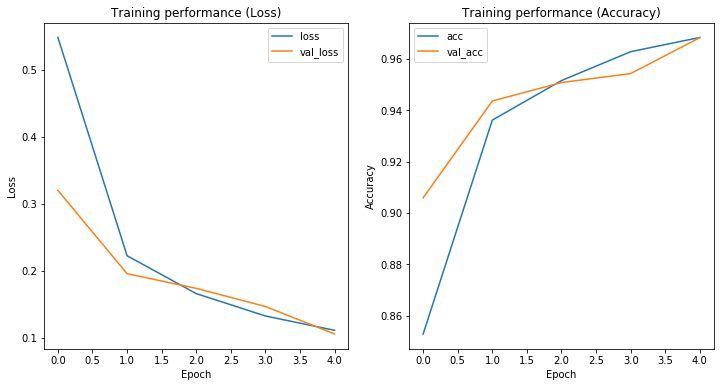

In [53]:
# 学習曲線
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].set_title('Training performance (Loss)')
ax[0].plot(history.epoch, history.history['loss'], label='loss')
ax[0].plot(history.epoch, history.history['val_loss'], label='val_loss')
ax[0].set(xlabel='Epoch', ylabel='Loss')
ax[0].legend()

ax[1].set_title('Training performance (Accuracy)')
ax[1].plot(history.epoch, history.history['acc'], label='acc')
ax[1].plot(history.epoch, history.history['val_acc'], label='val_acc')
ax[1].set(xlabel='Epoch', ylabel='Accuracy')
ax[1].legend(loc='best')

## 予測の可視化

In [54]:
# 予測値
Y_test_pred = model.predict(X_test)

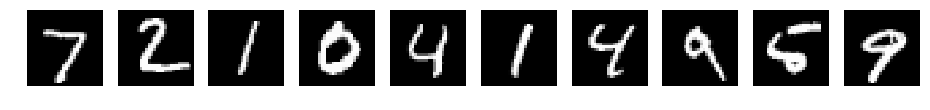

In [56]:
# テストデータの可視化
fig, ax = plt.subplots(1, 10, figsize=(16, 10))

for ii in range(10):
    ax[ii].imshow(X_test[ii].reshape(28, 28), cmap='gray') #iiの値+nでn番目以降のテストデータを出力する．
    ax[ii].axis('off')

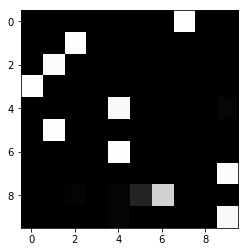

In [57]:
# 予測の可視化
plt.imshow(Y_test_pred[:10], cmap='gray', interpolation='nearest', vmin=0, vmax=1) #Y_test_predの範囲を帰ることで予測の場所を変更できる